-----
# 03 - Multibiomarker Analysis

In [1]:
from pathlib import Path
import seaborn as sns
import pandas as pd

from utils import format_dataframe, add_ratio_columns
from multibiomarker import MultiBiomarker
import constants

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Default Plot Style : 
sns.set(style="whitegrid")


## 1. Data Loading & Preparation

In [2]:
# Set path to Data Directory : 
DIR_DATA = Path.cwd() / "data"

# Check existence to training/test files : 
print(fr"Data Directory    : {str(DIR_DATA)}")
print(fr"Train Data exists : {(DIR_DATA / 'cercare_training_data.xlsx').exists()}")
print(fr"Test Data exists  : {(DIR_DATA / 'cercare_test_data.xlsx').exists()}")


Data Directory    : /home/maichi/work/my_projects/CercareStatAnalysis/data
Train Data exists : True
Test Data exists  : True


In [3]:
# Load Cercare Training / Test Excel spreadsheets :
df_data = pd.read_excel(DIR_DATA / "cercare_training_data.xlsx").rename(columns=constants.DICT_RENAMING_MAPPING)
df_test = pd.read_excel(DIR_DATA / "cercare_test_data.xlsx").rename(columns=constants.DICT_RENAMING_MAPPING)

# Format dataframes : 
df_data = format_dataframe(df=df_data)
df_test = format_dataframe(df=df_test)

# Add the ratio columns : 
add_ratio_columns(df_data)
add_ratio_columns(df_test)

print("Data Loaded and formatted Successfully ! ")


Data Loaded and formatted Successfully ! 


##  2. 🔧  Configuration 

In [4]:
BIOMARKERS = ["CBV_corr", "CBV_noncorr", "DELAY", "CTH", "CTH MAX", "OEF", "rLEAKAGE", "rCMRO2", "COV", ]

In [5]:
# Multibiomarker object Initialization : 
mb = MultiBiomarker(biomarkers=BIOMARKERS, data = df_data, test_data=df_test)
print(mb)


Biomarker object
- Parameters: CBV_corr_ratio, CBV_noncorr_ratio, DELAY_ratio, CTH_ratio, CTH MAX_ratio, OEF_ratio, rLEAKAGE_ratio, rCMRO2_ratio, COV_ratio
- Training samples: 182
- Test samples: 23



## 3.  t-SNE plotting

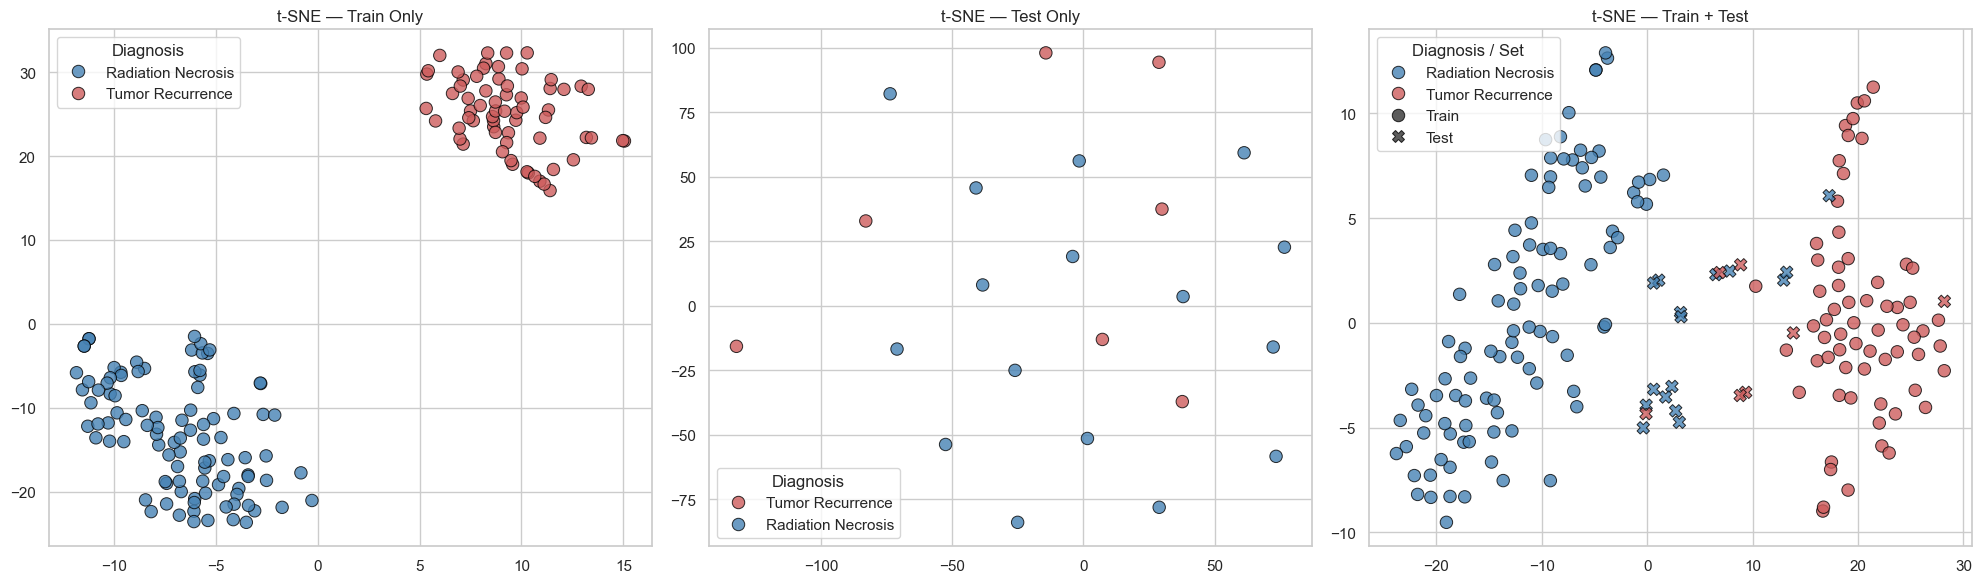

In [6]:
mb.plot_tsne(perplexity=20)

## 4.  UMAP plotting

/home/maichi/.conda/envs/cercare/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


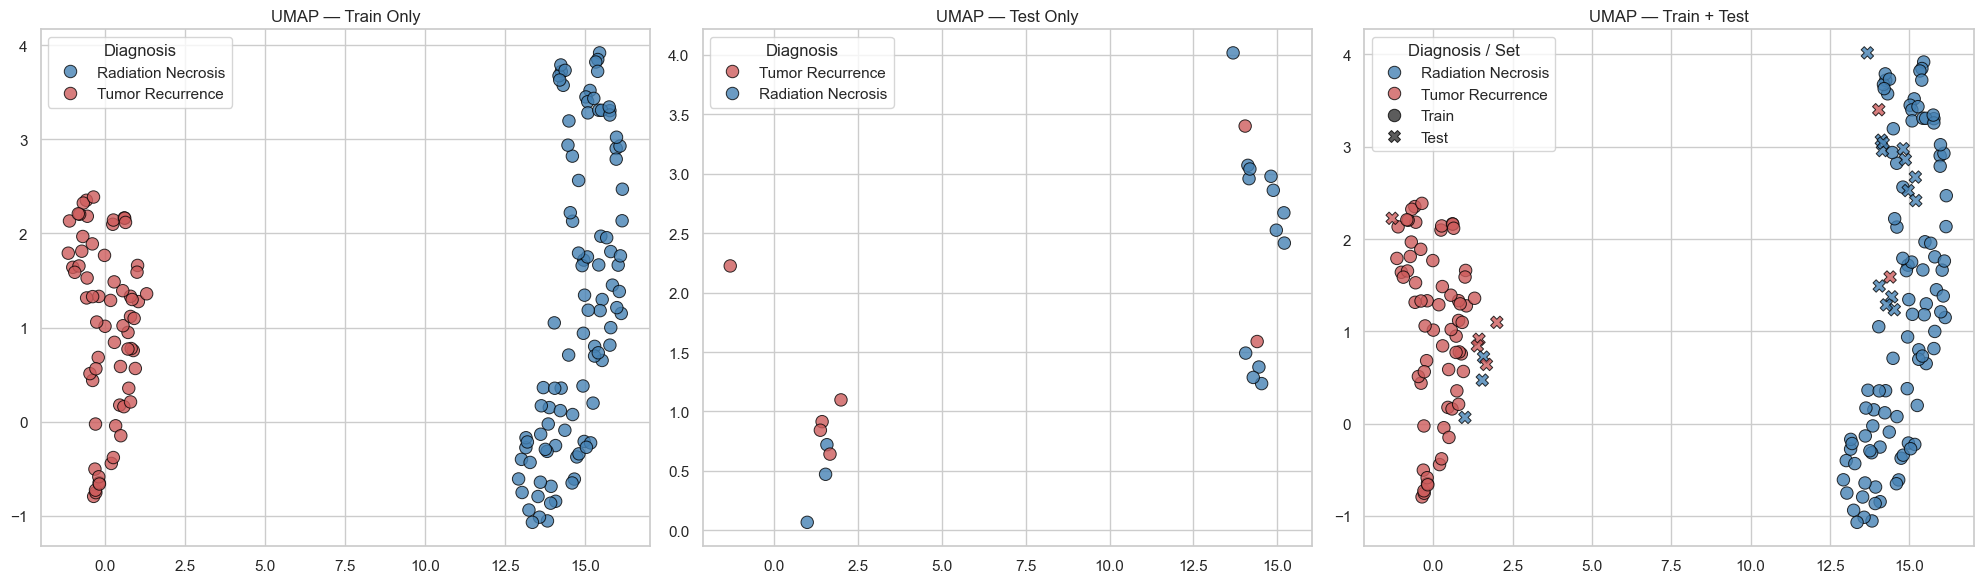

In [7]:
mb.plot_umap()

## 5. Correlation : 

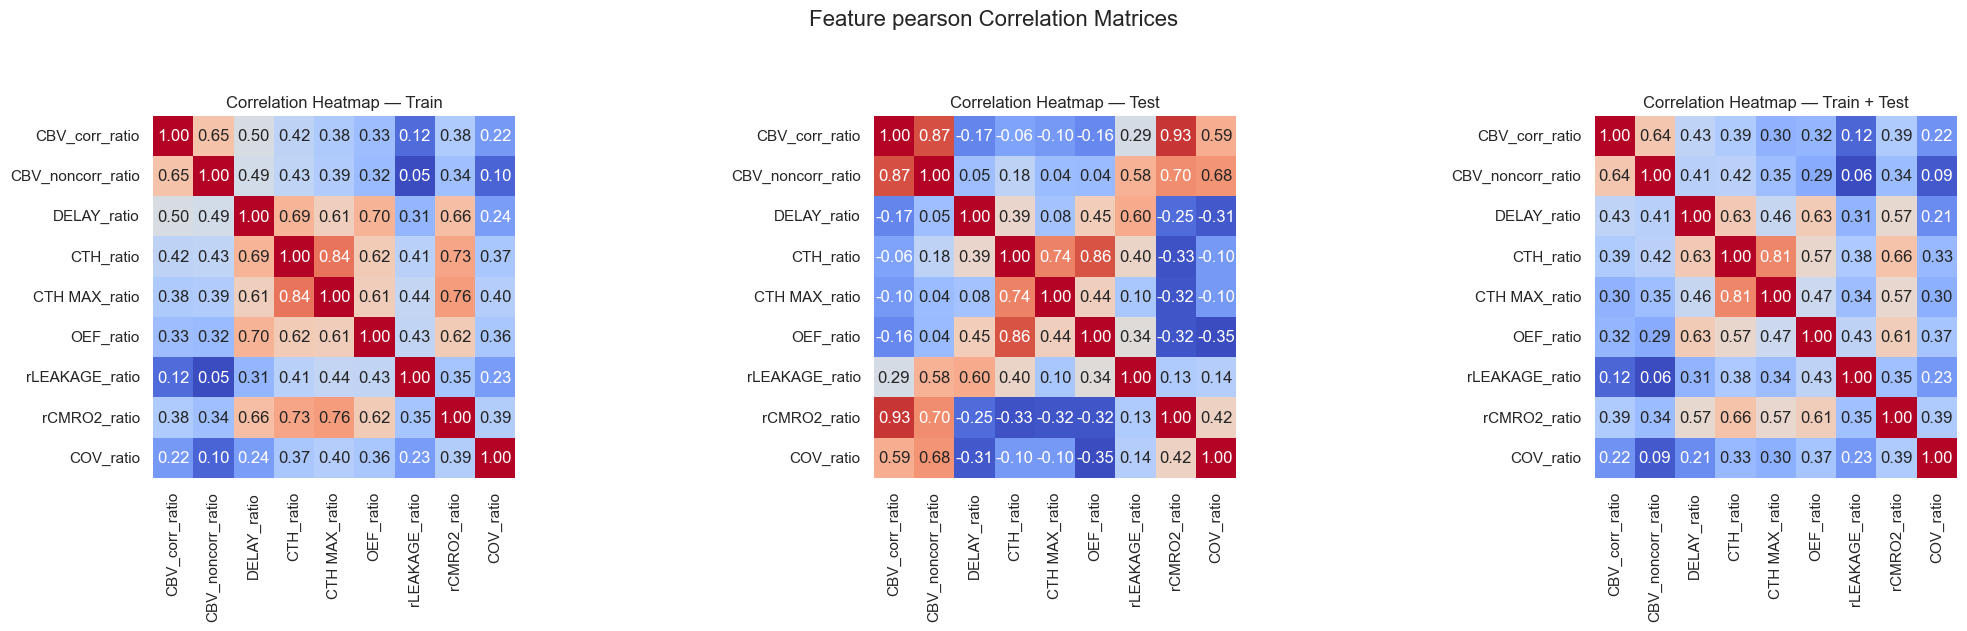

In [8]:
mb.plot_correlation_heatmap(method="pearson")

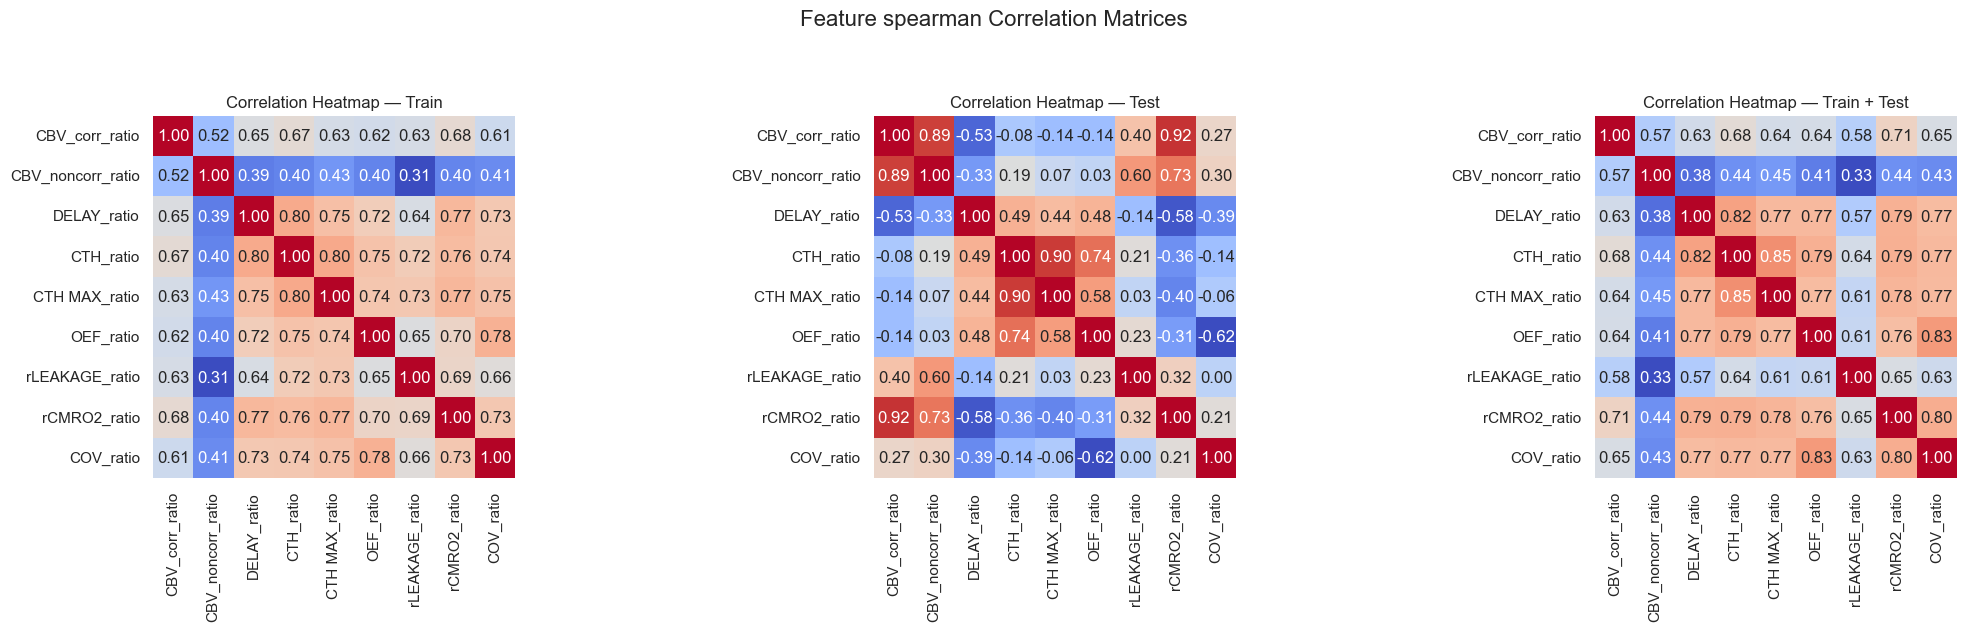

In [9]:
mb.plot_correlation_heatmap(method="spearman")

## 6. PairPlot : 

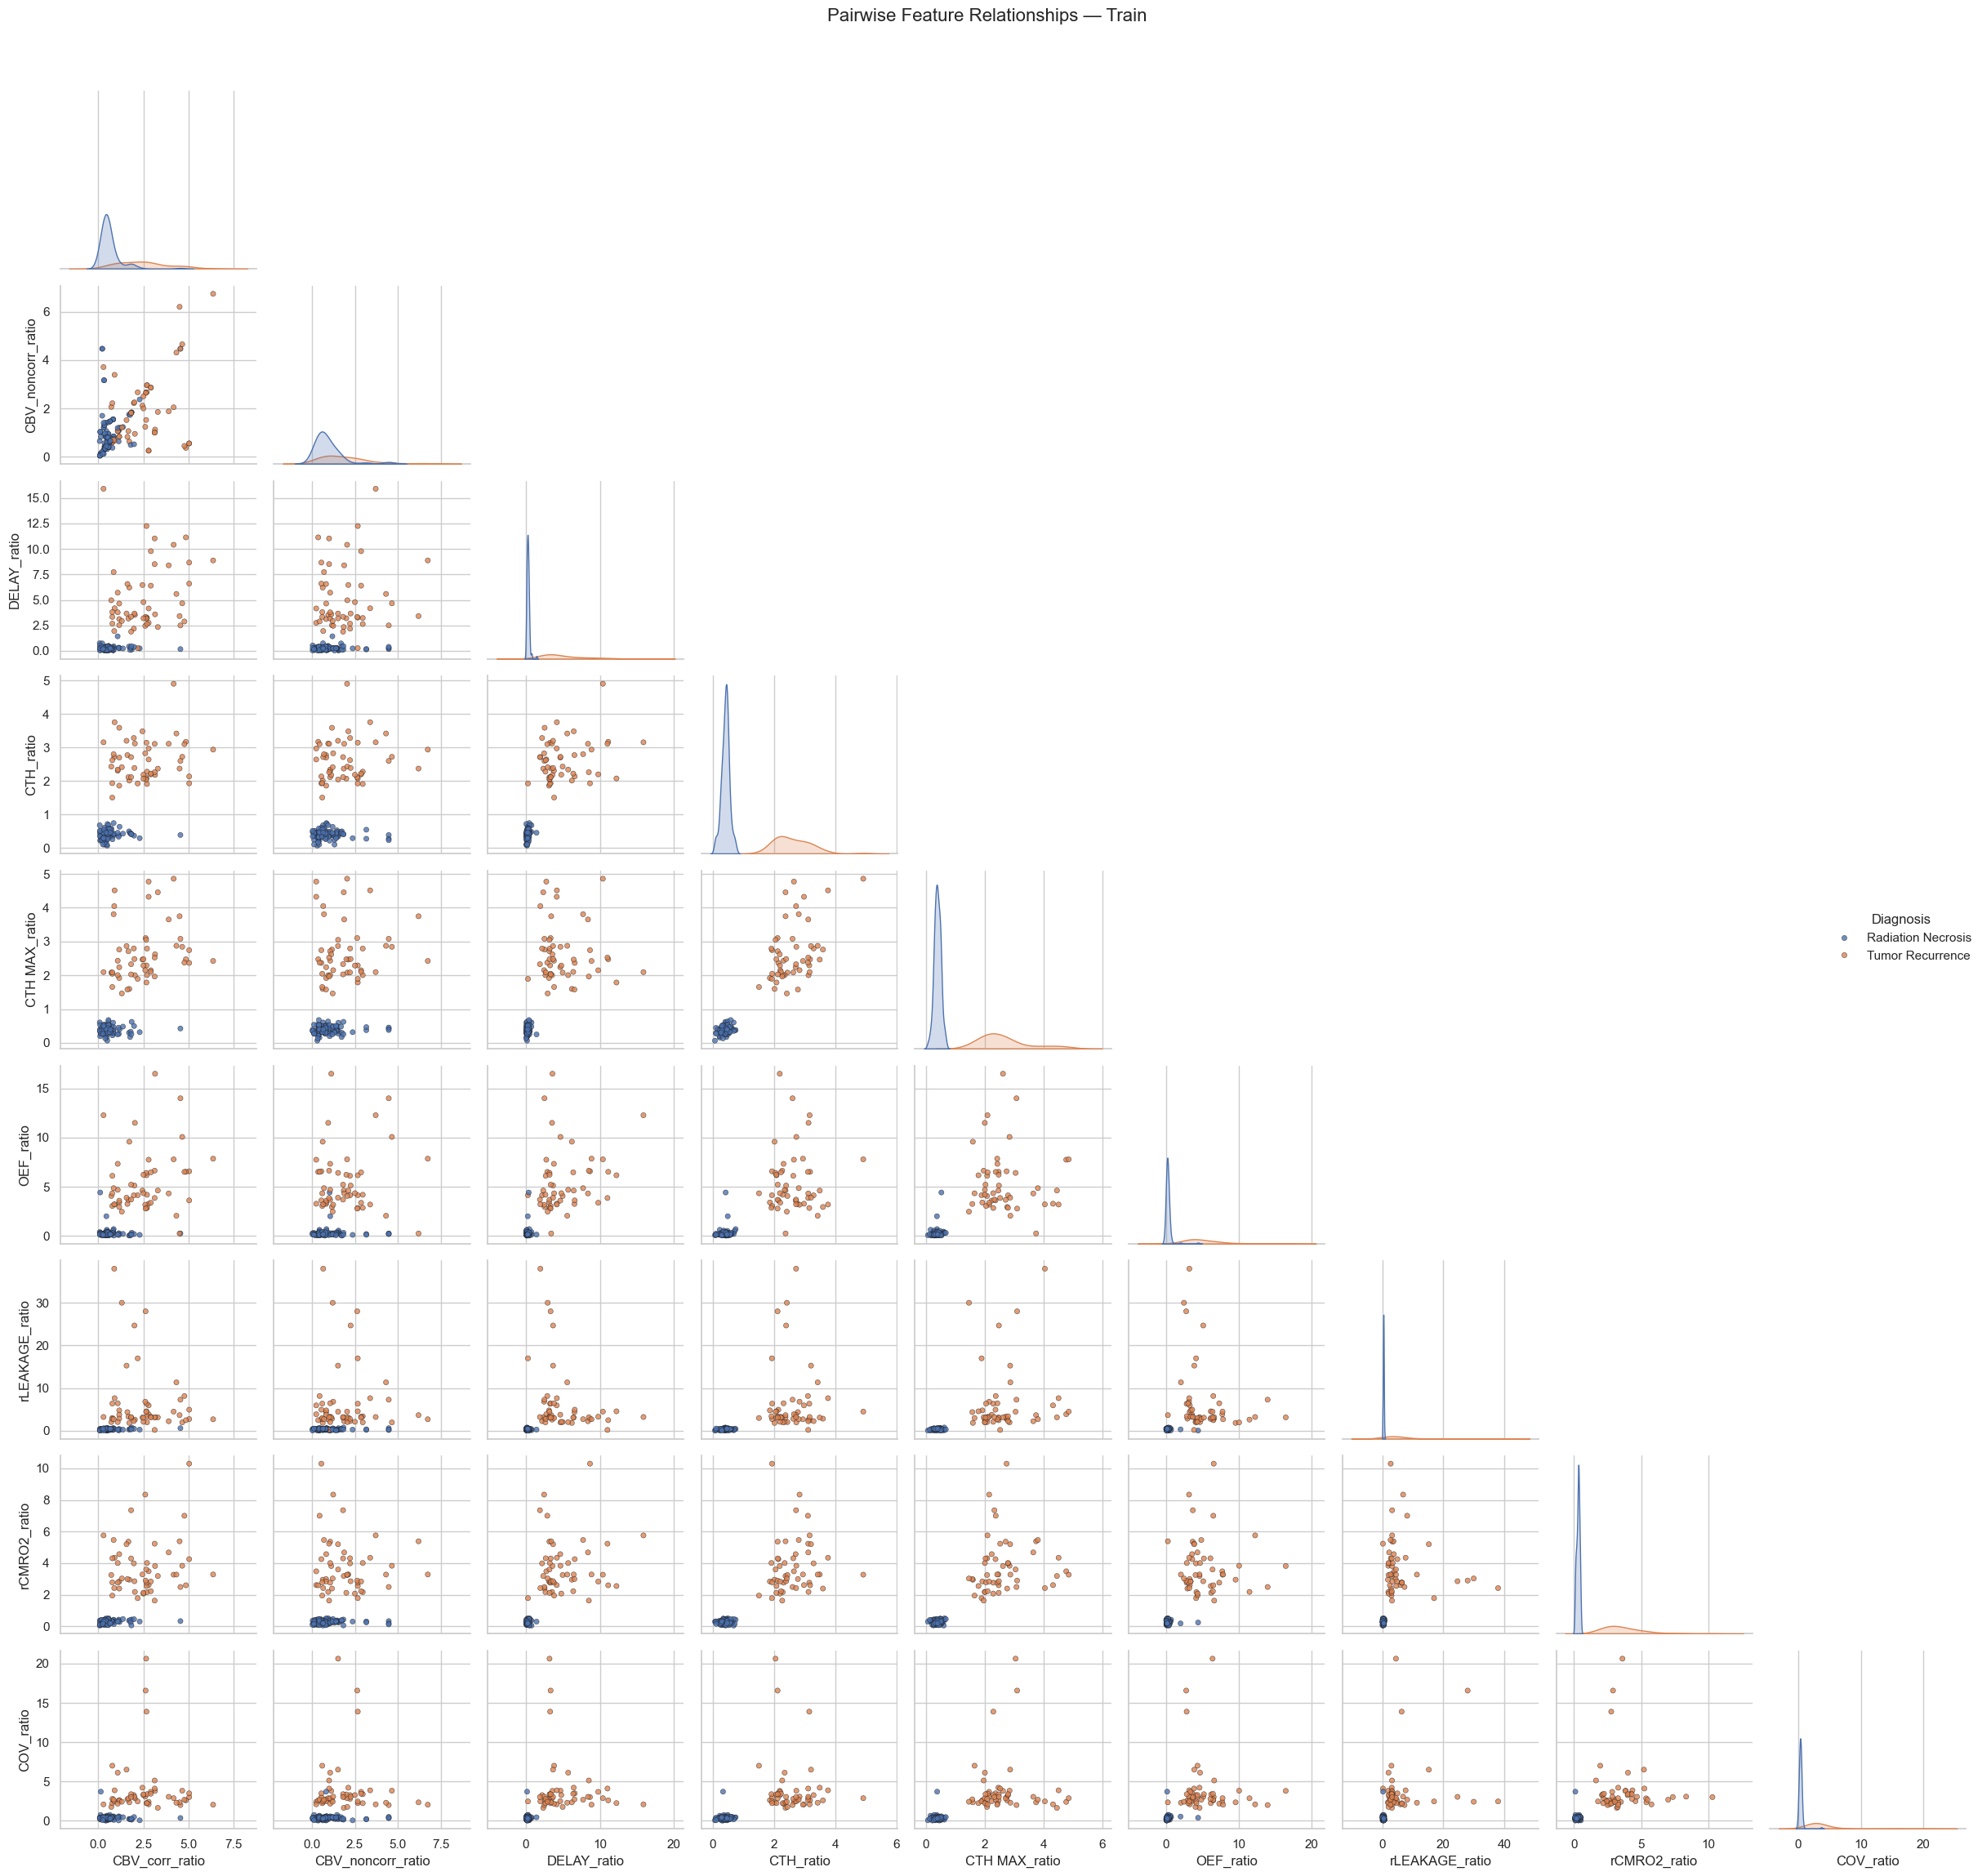

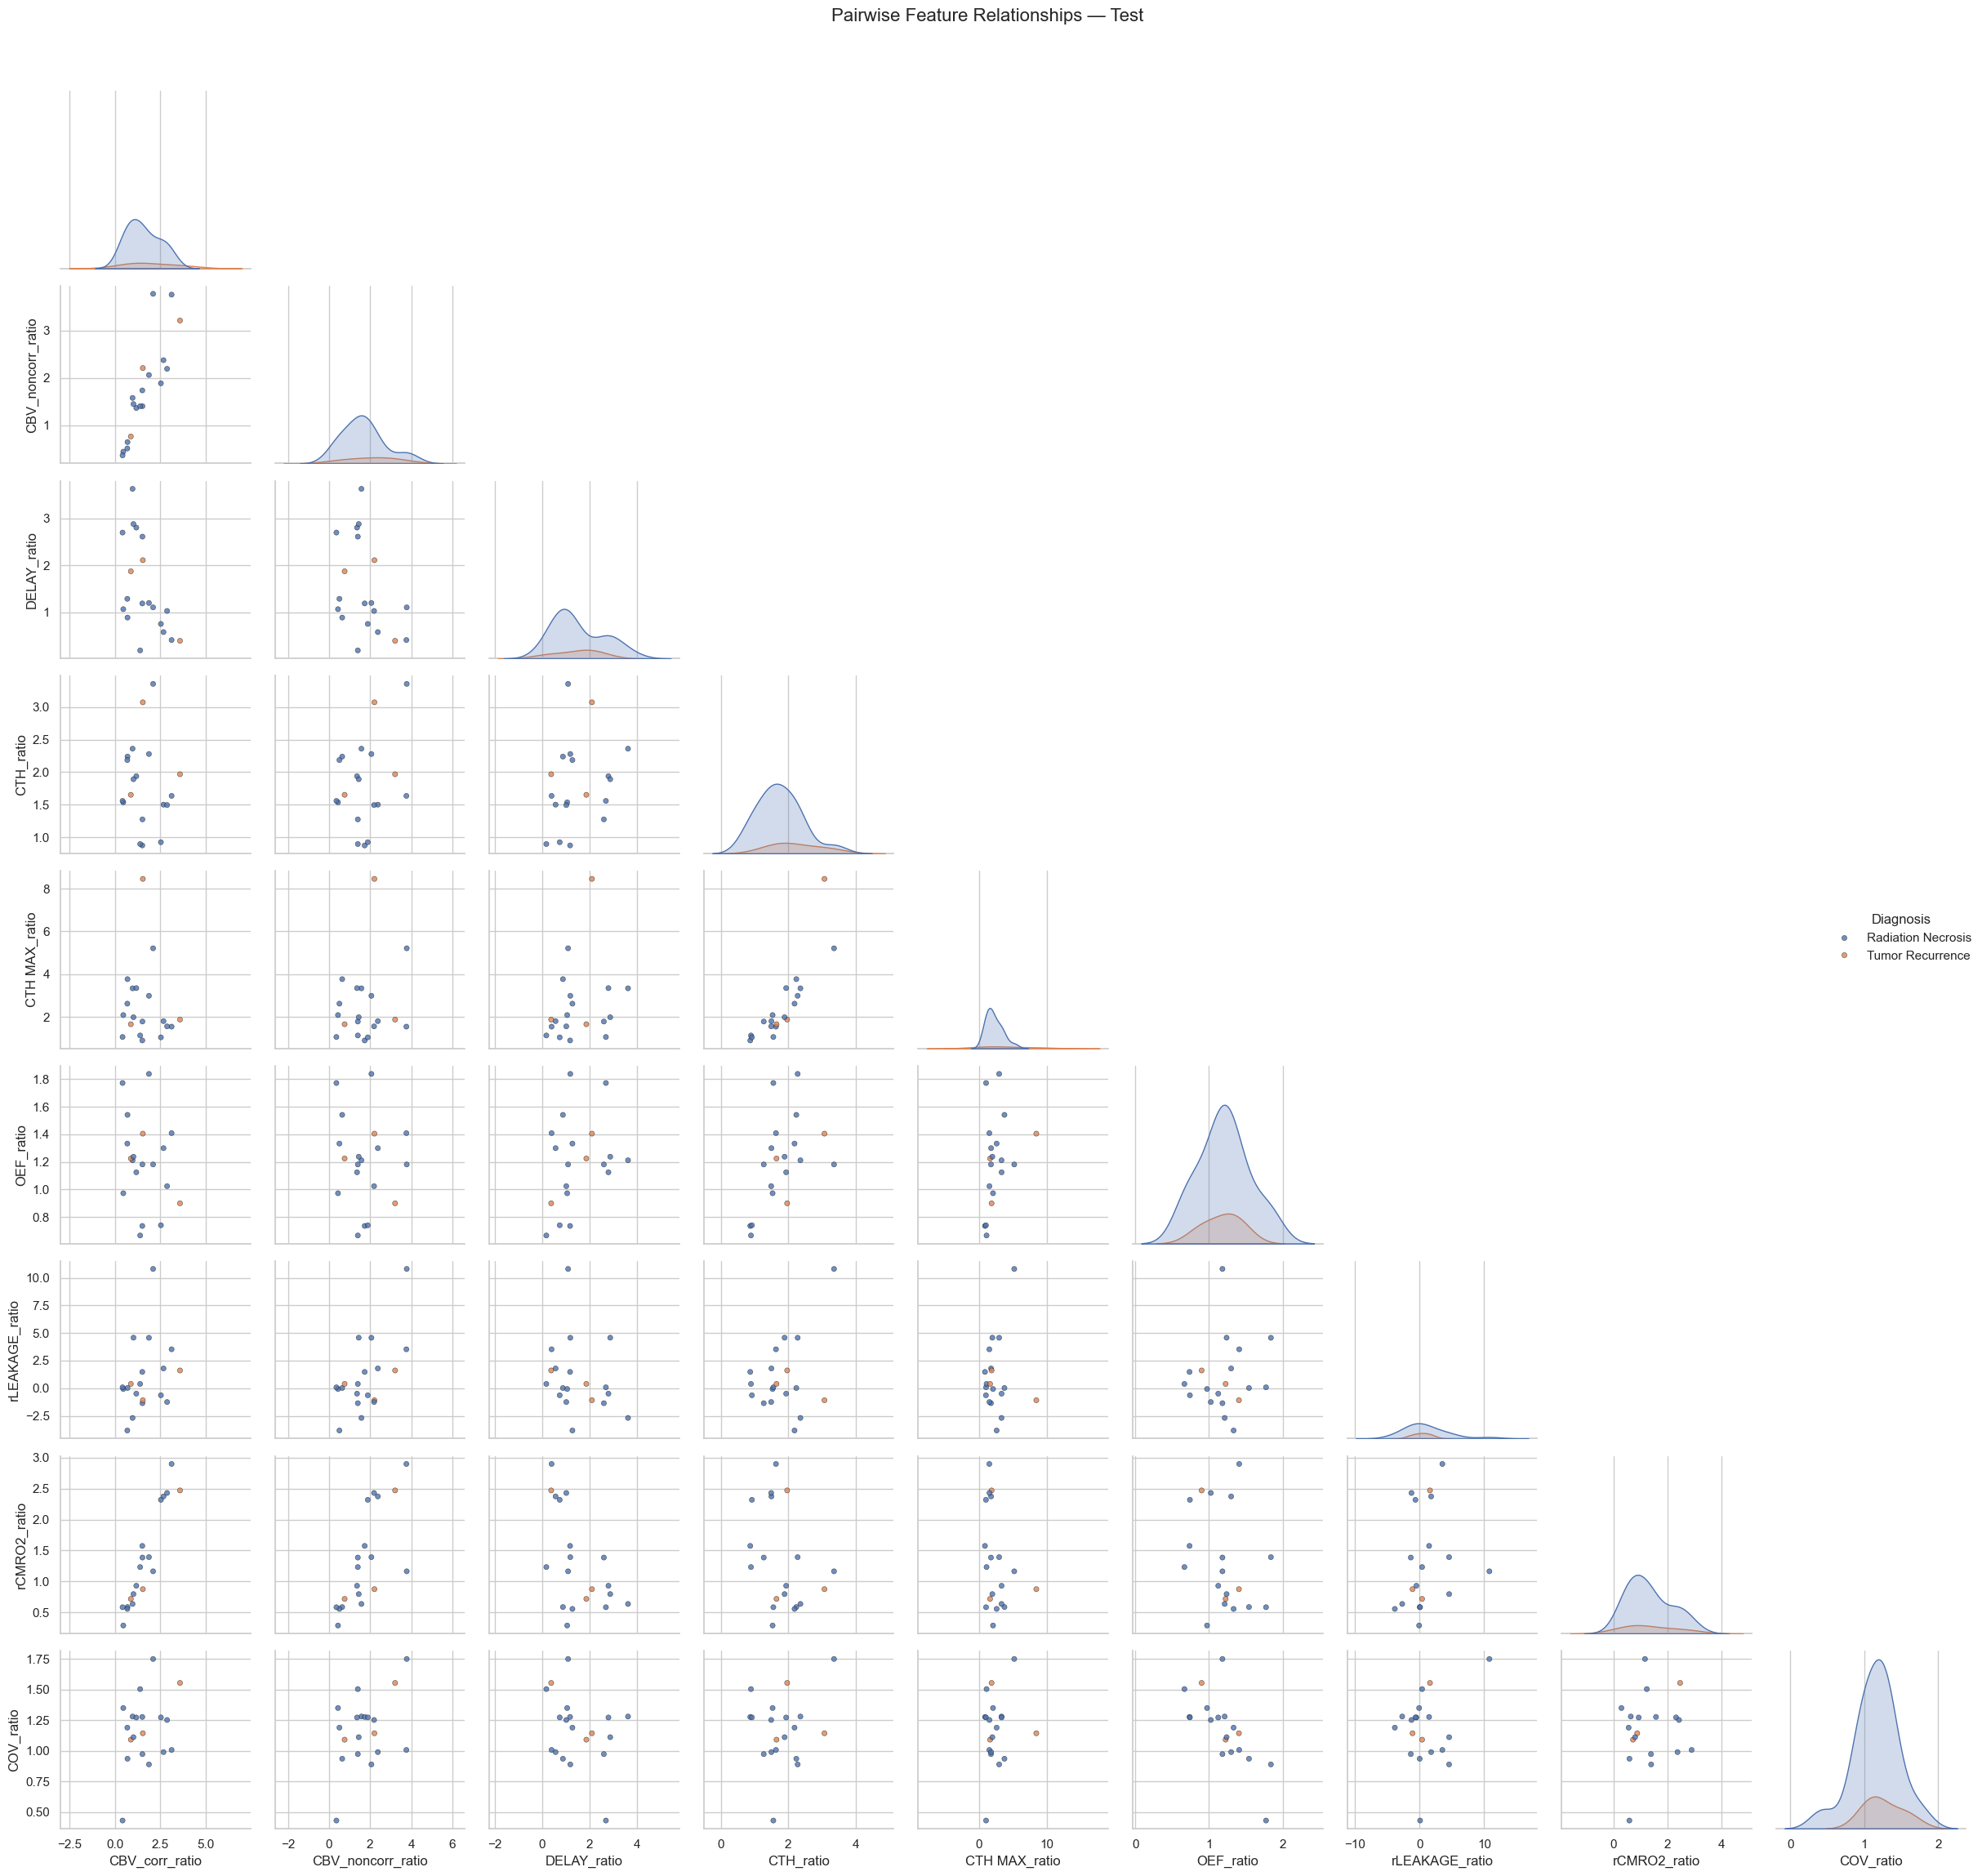

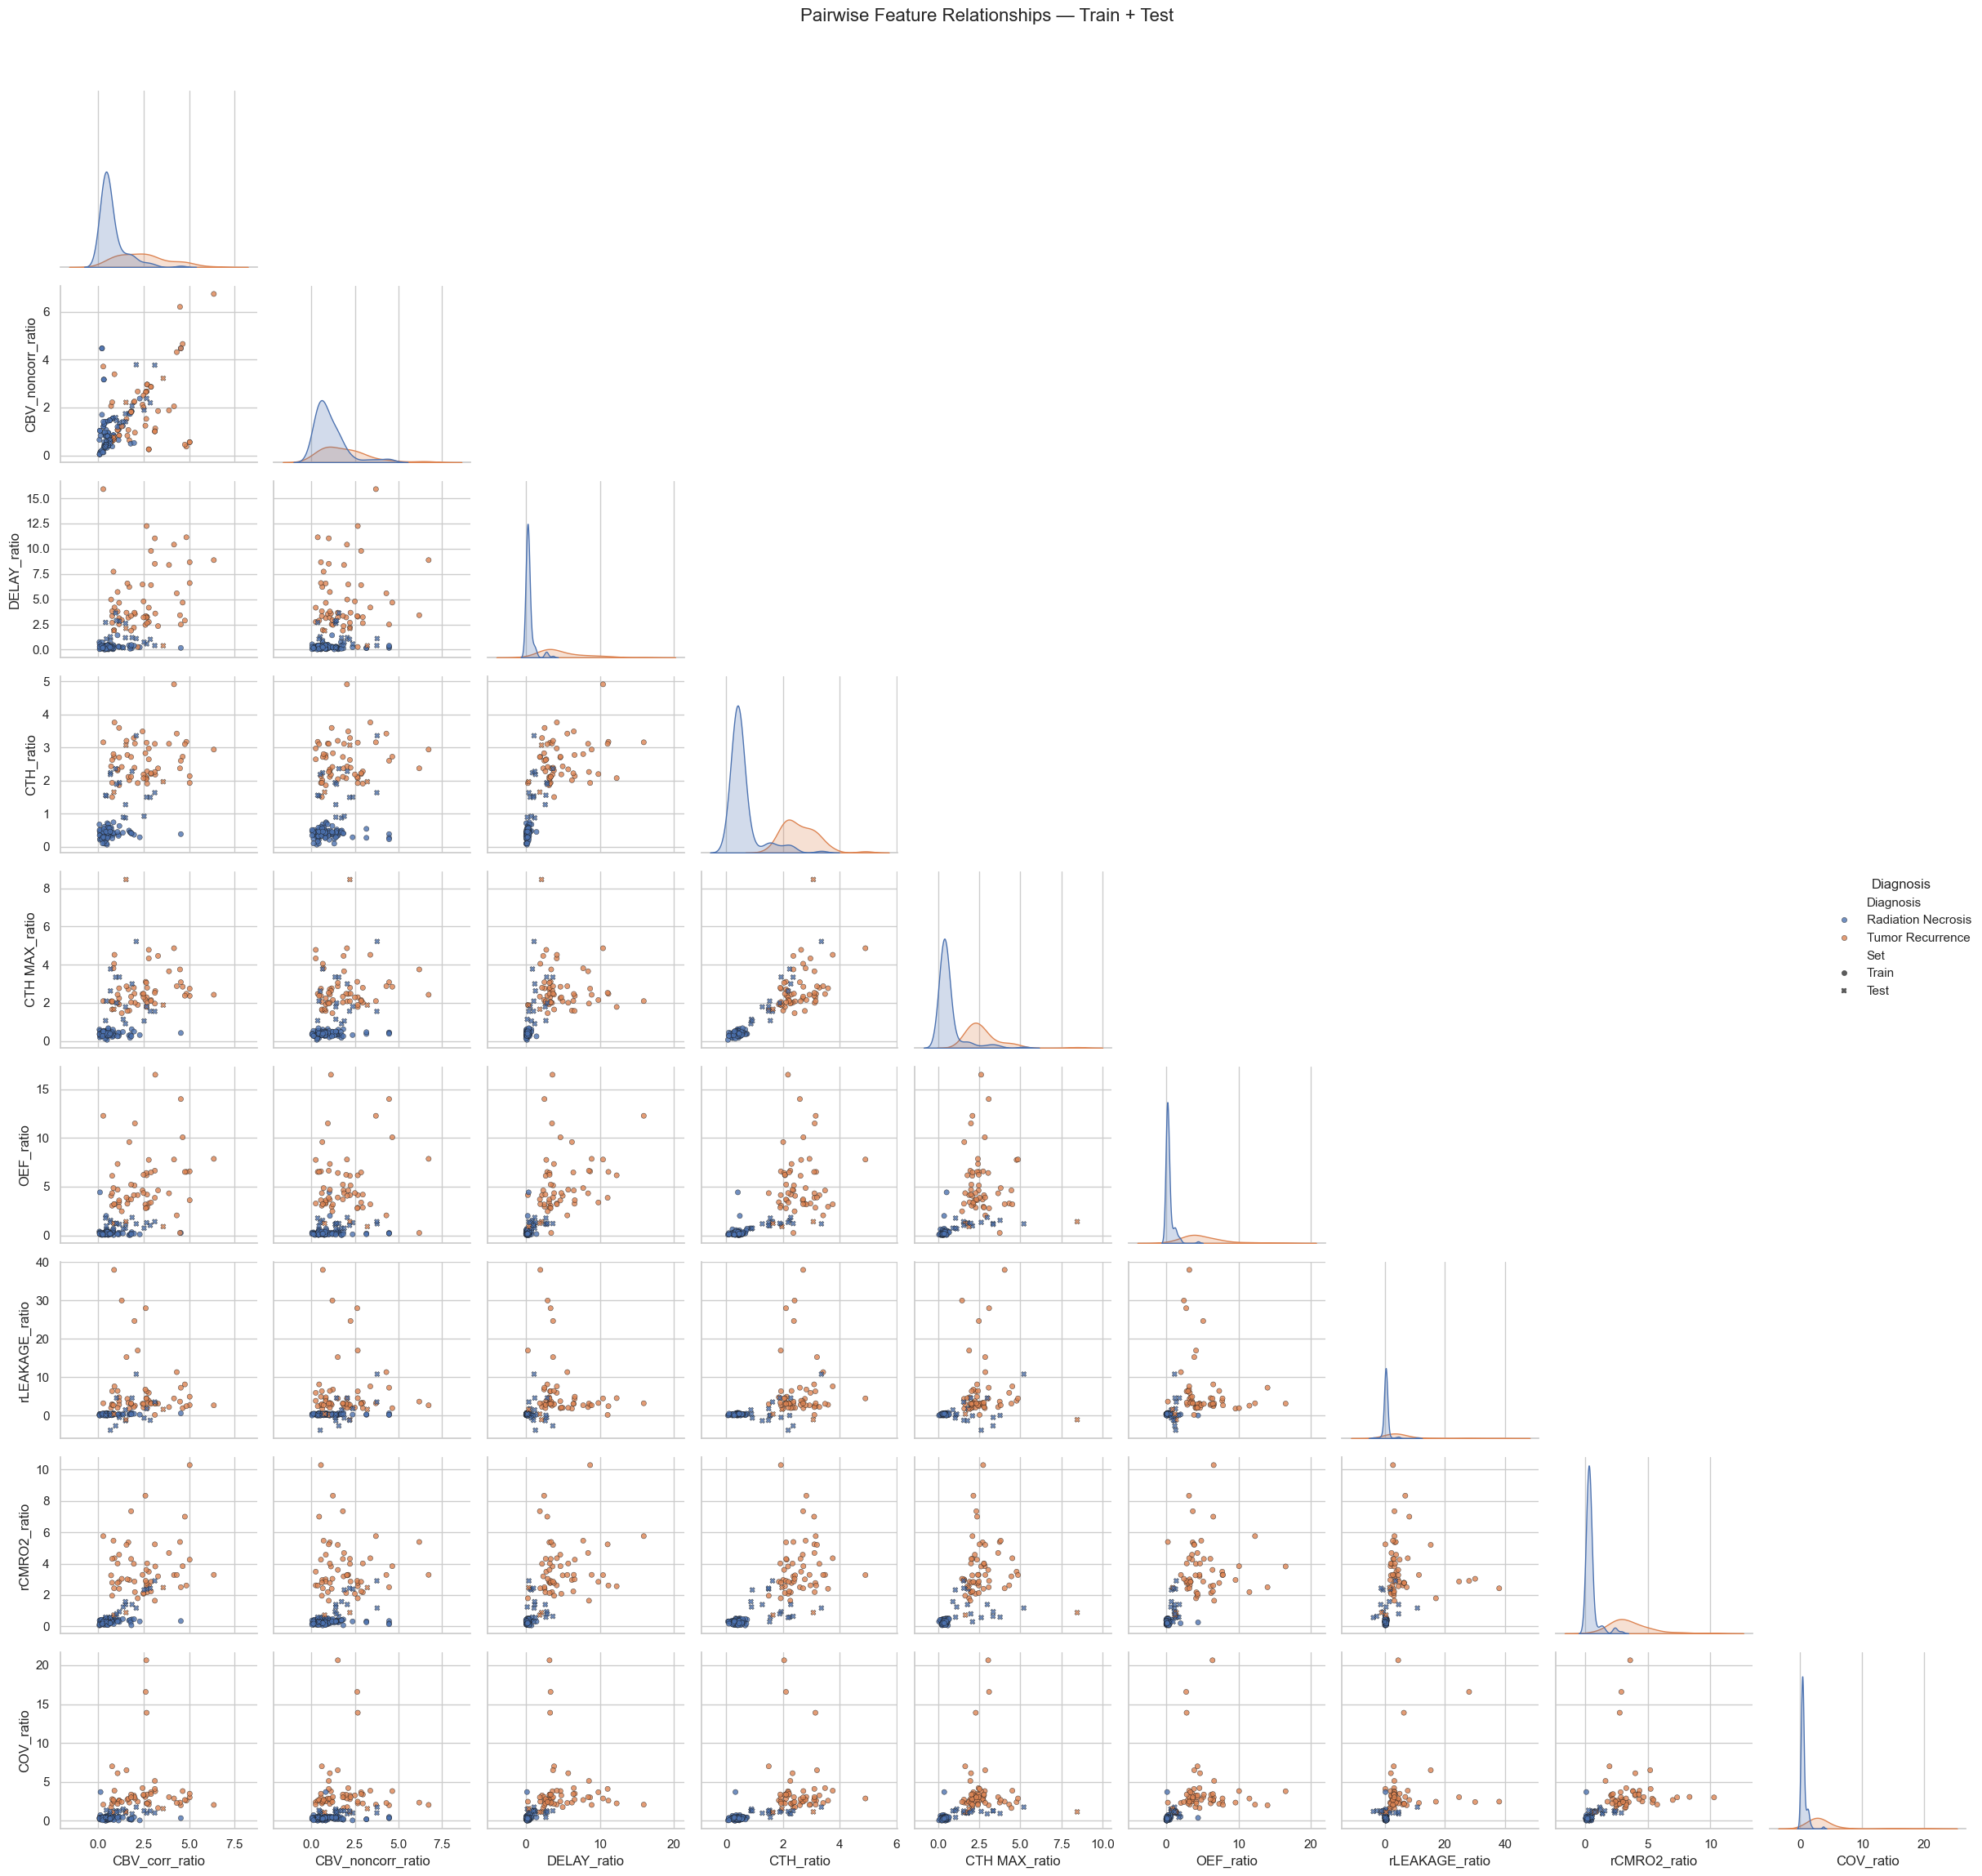

In [6]:
mb.plot_feature_pairplot(s=20, alpha=0.8, lower=0.00, upper=0.99)

## 7. XGBoost : 

Covariance of AUC is 0.0; defaulting to a small delta for CI computation.
XGBOOST (depth=3, lr=0.1, n_estimators=100)
----------------------------------------------------------------------------------------------------
AUC (Train): 1.000 (95% CI: 1.000 – 1.000)
AUC (Test) : 0.616 (95% CI: 0.430 – 0.802)
----------------------------------------------------------------------------------------------------

▶ XGBOOST TRAIN
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |     100.0
Recall (Sensitivity) |     100.0
Specificity          |     100.0
Precision            |     100.0
F1 Score             |     100.0

▶ XGBOOST TEST
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      52.2
Recall (Sensitivity) |      85.7
Specificity          |      37.5
Precision            |   

/home/maichi/.conda/envs/cercare/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:03:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


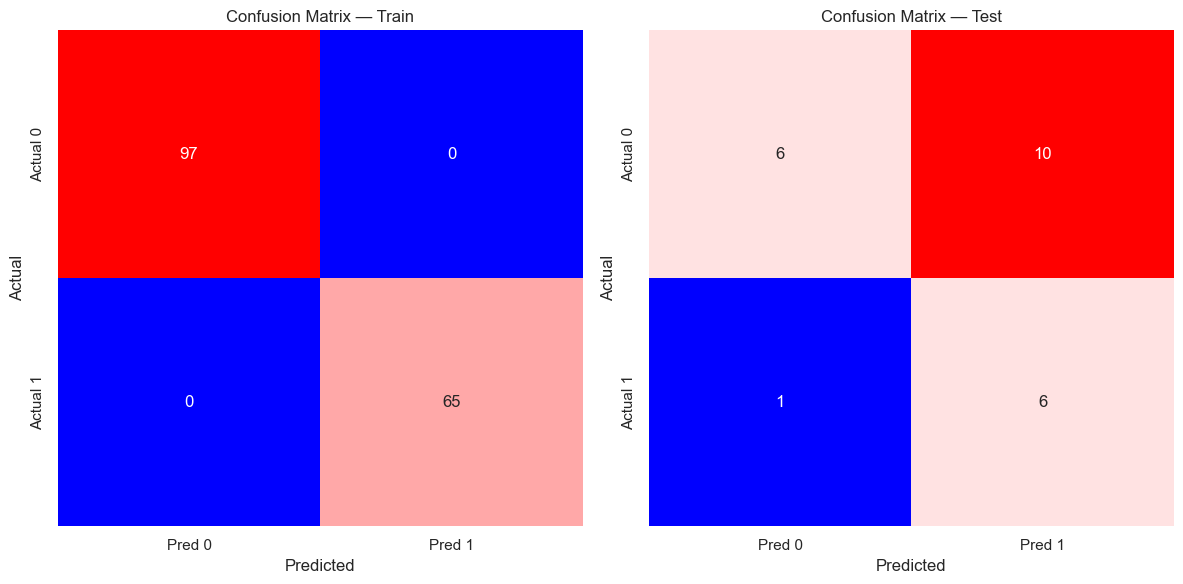

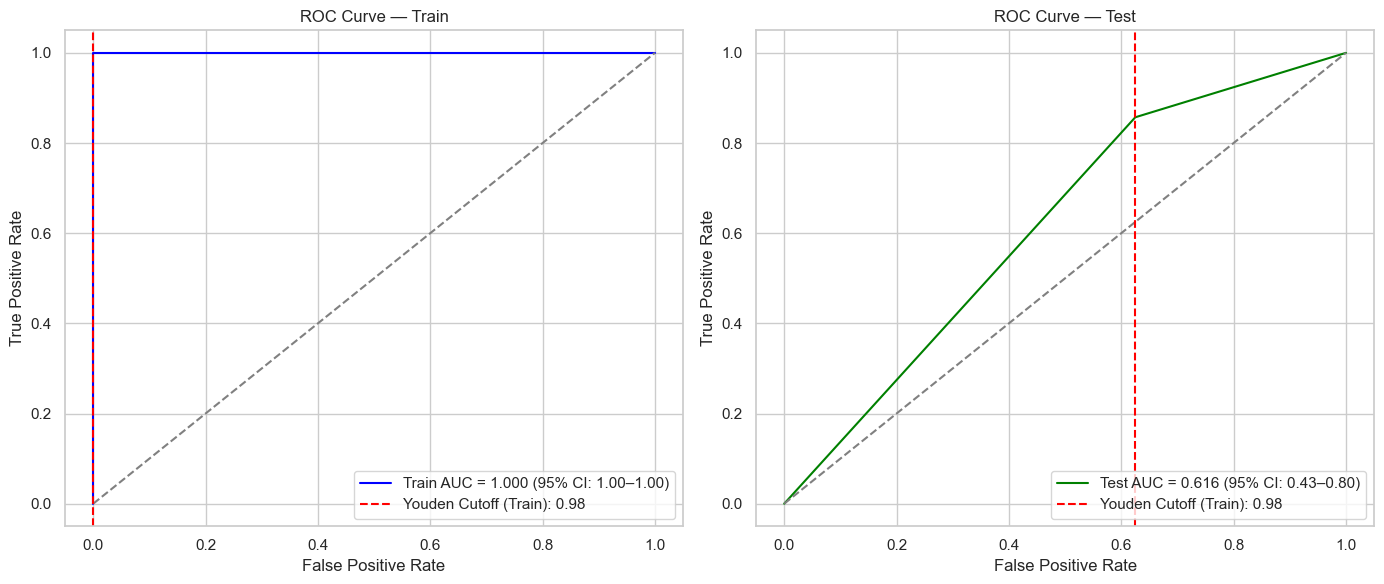

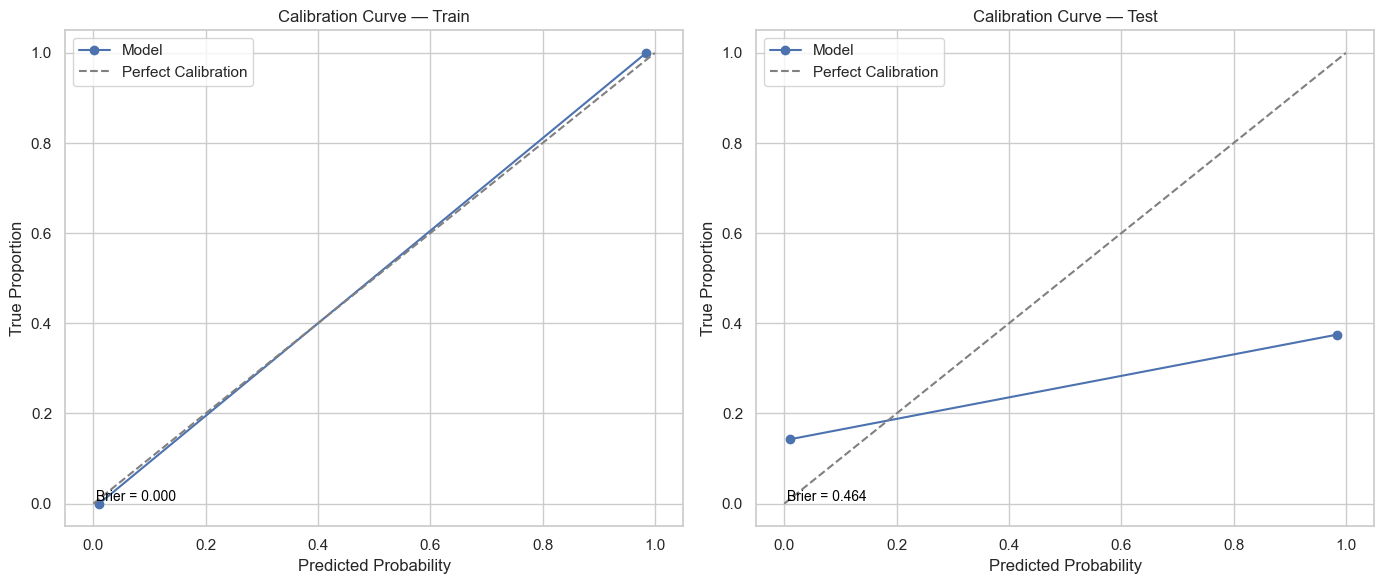

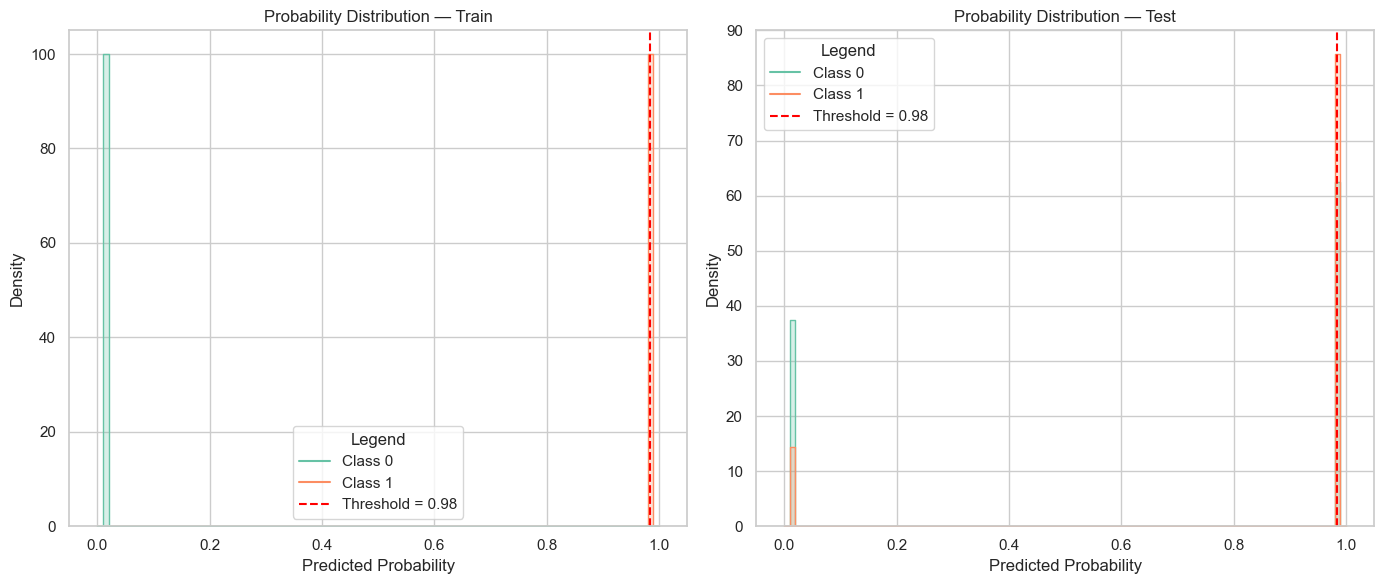

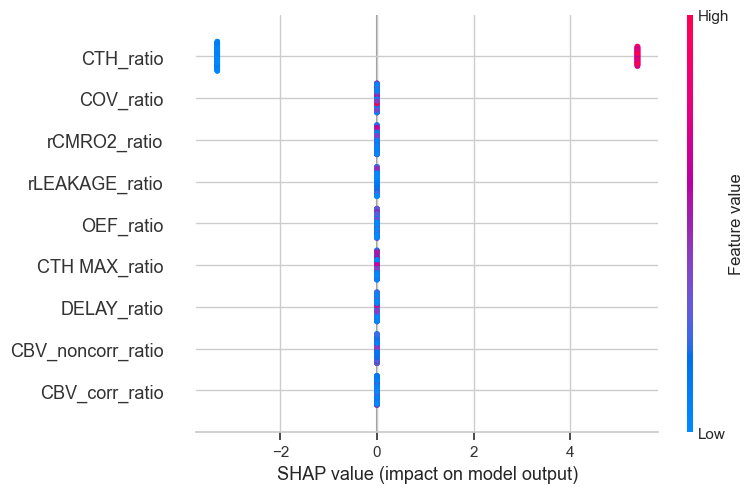

In [12]:
mb.evaluate_xgboost_model(max_depth=3, n_estimators=100, learning_rate=0.1, eval_metric="logloss", use_label_encoder=False)

## 8. Random Forest

Covariance of AUC is 0.0; defaulting to a small delta for CI computation.
RANDOM FOREST (n=1000, max_depth=3, max_features=0.2222222222222222)
----------------------------------------------------------------------------------------------------
AUC (Train): 1.000 (95% CI: 1.000 – 1.000)
AUC (Test) : 0.625 (95% CI: 0.342 – 0.908)
----------------------------------------------------------------------------------------------------

▶ RANDOM FOREST TRAIN
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |     100.0
Recall (Sensitivity) |     100.0
Specificity          |     100.0
Precision            |     100.0
F1 Score             |     100.0

▶ RANDOM FOREST TEST
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      47.8
Recall (Sensitivity) |      85.7
Specificity          

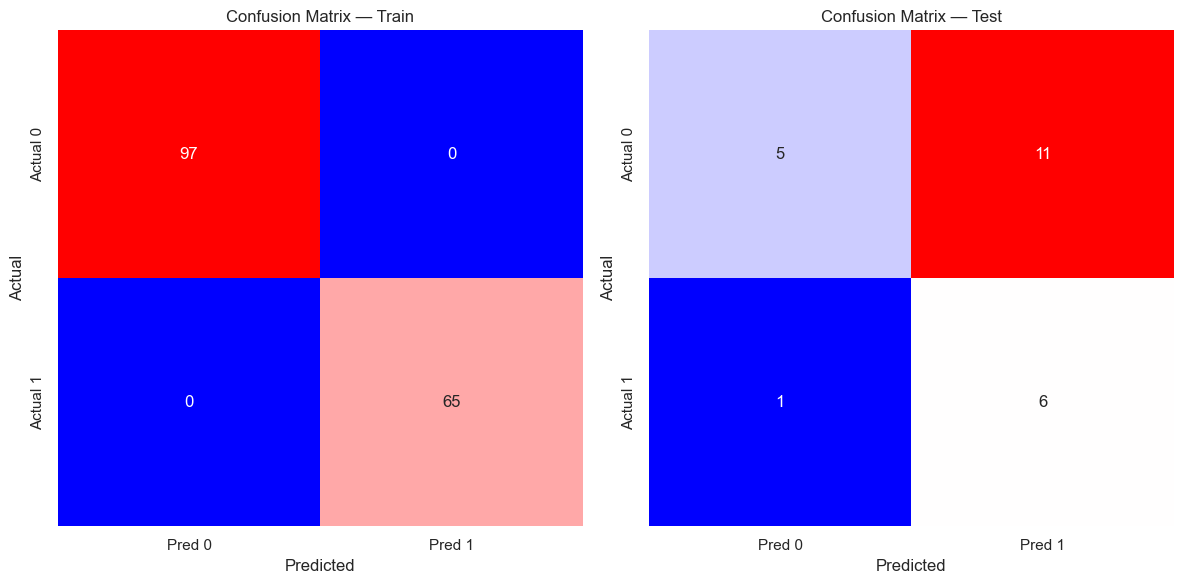

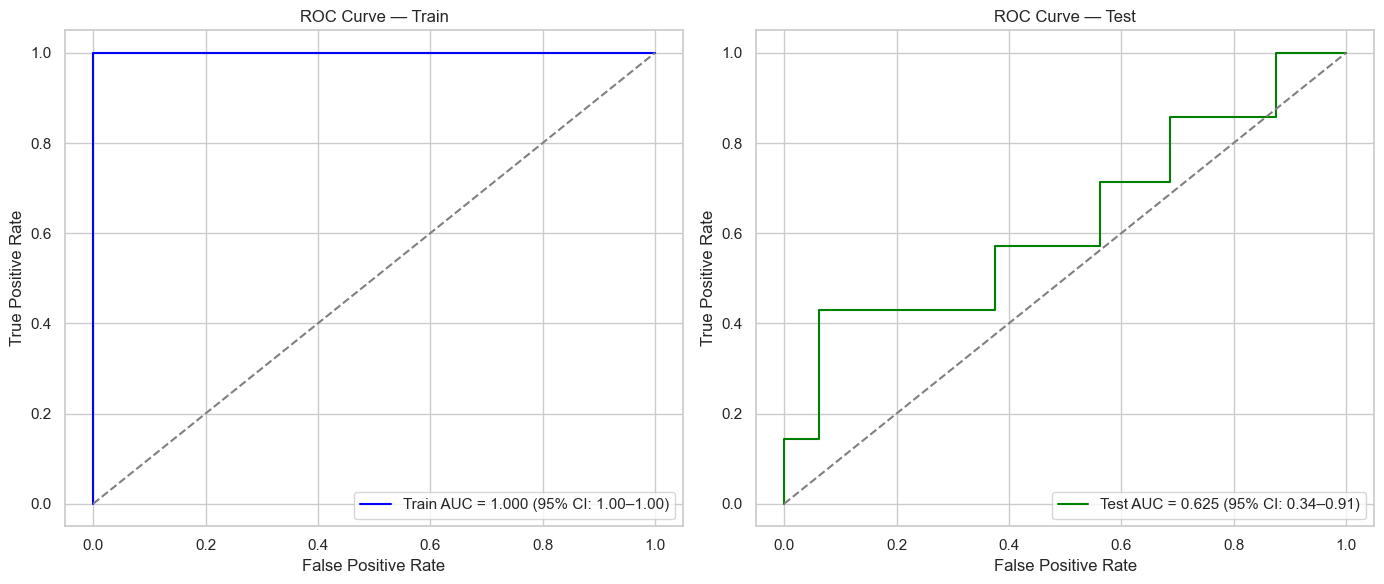

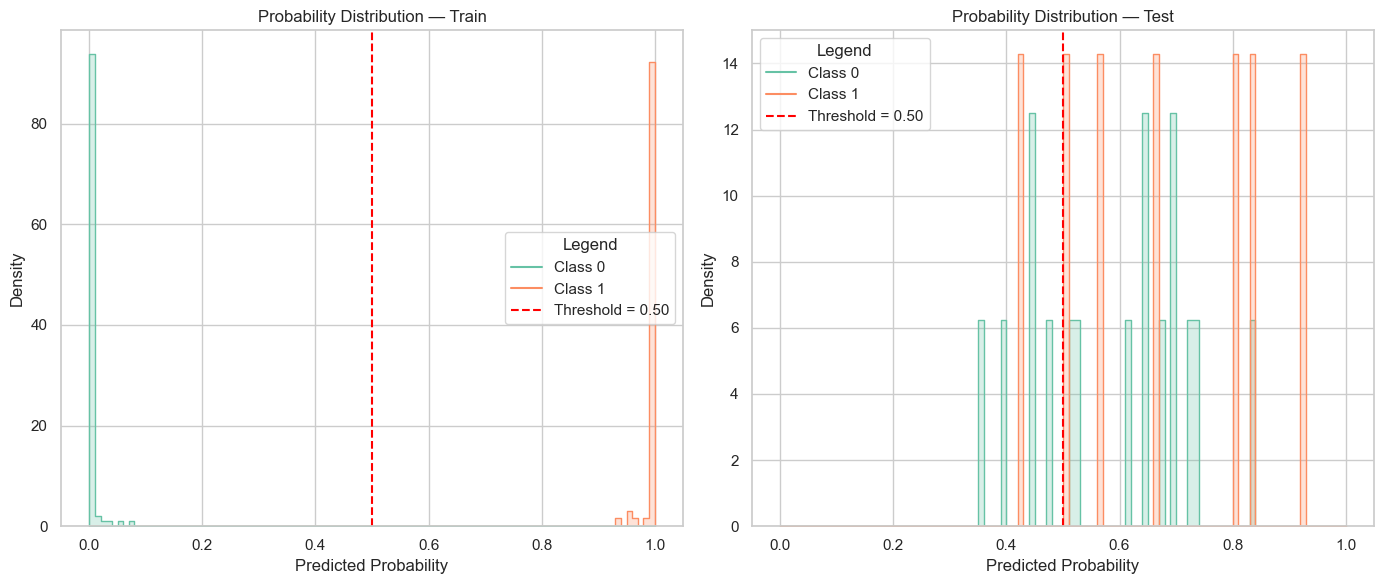

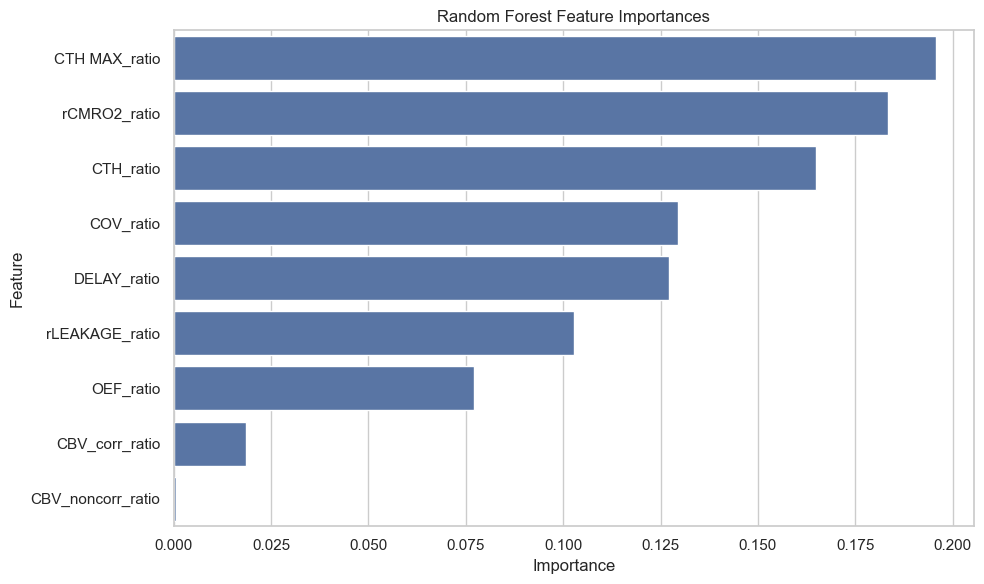

In [13]:
mb.evaluate_random_forest_model(n_estimators=1000,max_depth=3,max_features=2/9, bootstrap=True)

In [14]:
# param_grid = {
#     "n_estimators": [10, 20, 50, 100],
#     "max_depth": [1, 2, 3, 4, 5, None],
#     "max_features": list(range(1, len(BIOMARKERS) + 1)) + [None],
#     "bootstrap": [True, False],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4, 6]
# }

Covariance of AUC is 0.0; defaulting to a small delta for CI computation.
RANDOM FOREST (n=20, max_depth=3, max_features=1)
----------------------------------------------------------------------------------------------------
AUC (Train): 1.000 (95% CI: 1.000 – 1.000)
AUC (Test) : 0.964 (95% CI: 0.898 – 1.000)
----------------------------------------------------------------------------------------------------

▶ RANDOM FOREST TRAIN
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |     100.0
Recall (Sensitivity) |     100.0
Specificity          |     100.0
Precision            |     100.0
F1 Score             |     100.0

▶ RANDOM FOREST TEST
--------------------------------------------------
Metric               |  Value (%)
--------------------------------------------------
Accuracy             |      82.6
Recall (Sensitivity) |     100.0
Specificity          |      75.0
Precisi

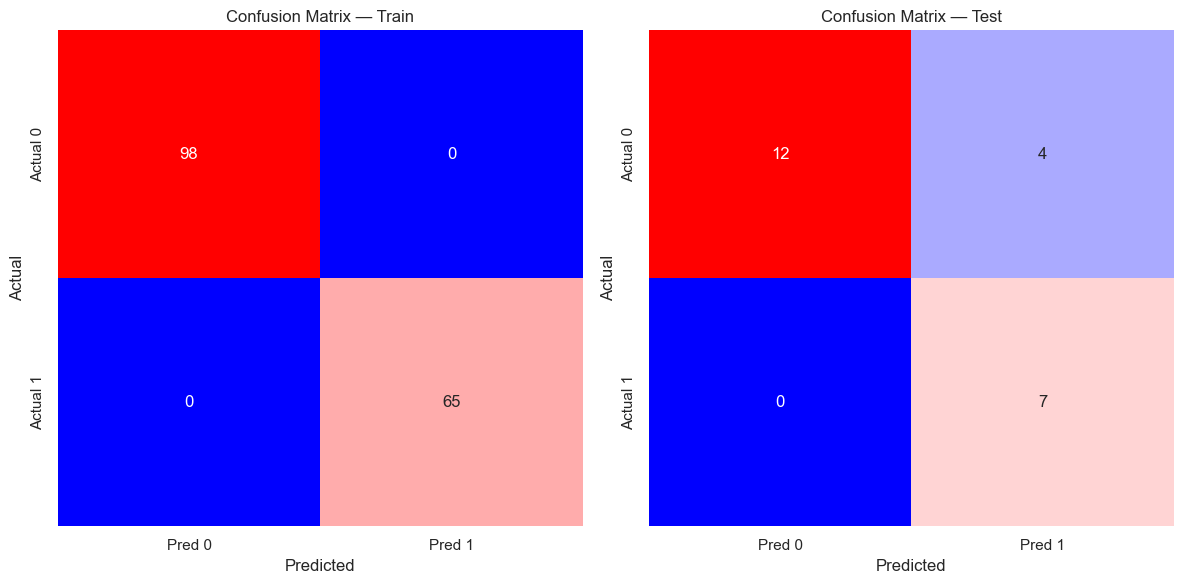

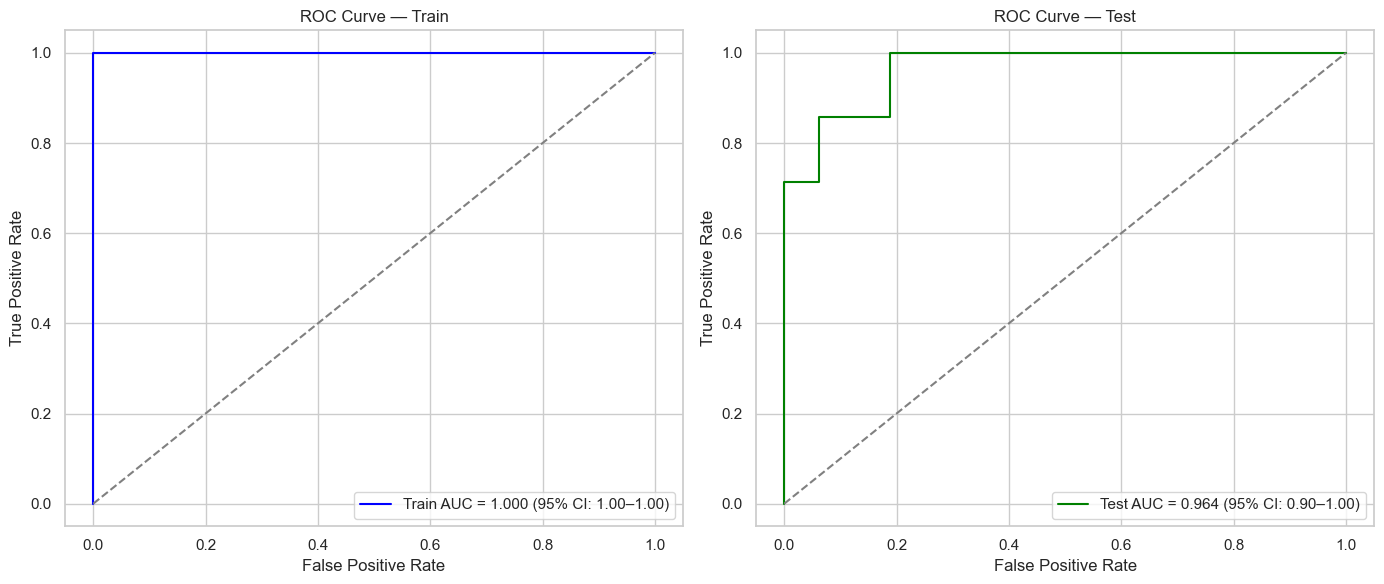

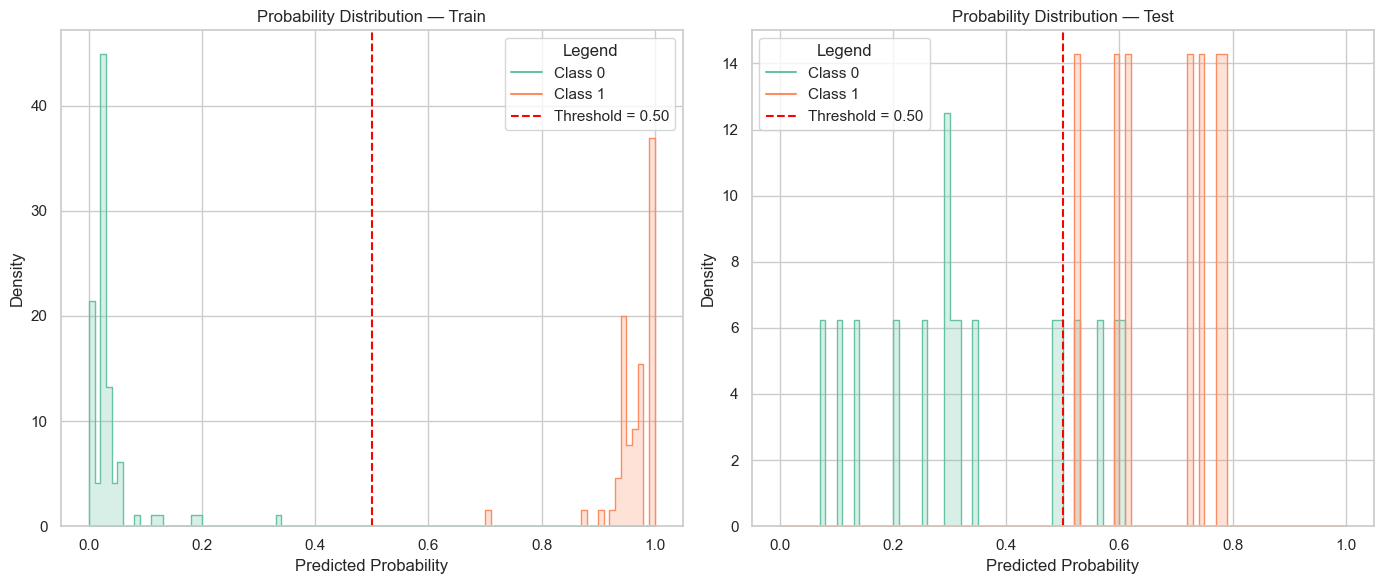

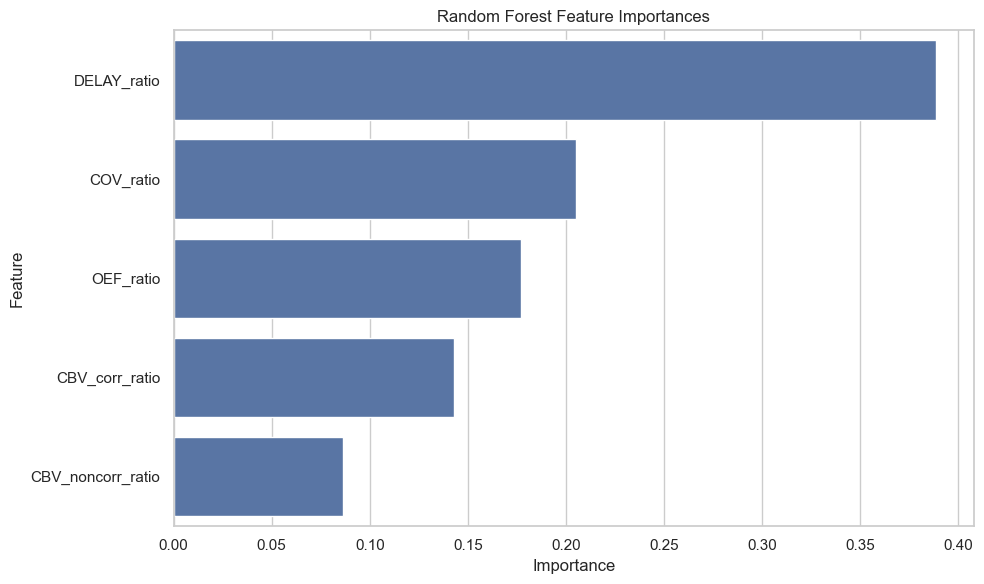

In [15]:
# After grid search, the best combination is :

best_mb = MultiBiomarker(biomarkers=["CBV_corr", "CBV_noncorr", "DELAY", "OEF", "COV"], data=df_data, test_data=df_test)
best_mb.evaluate_random_forest_model(n_estimators=20, max_depth=3, bootstrap=True, min_samples_split=5, min_samples_leaf=1, max_features=1)



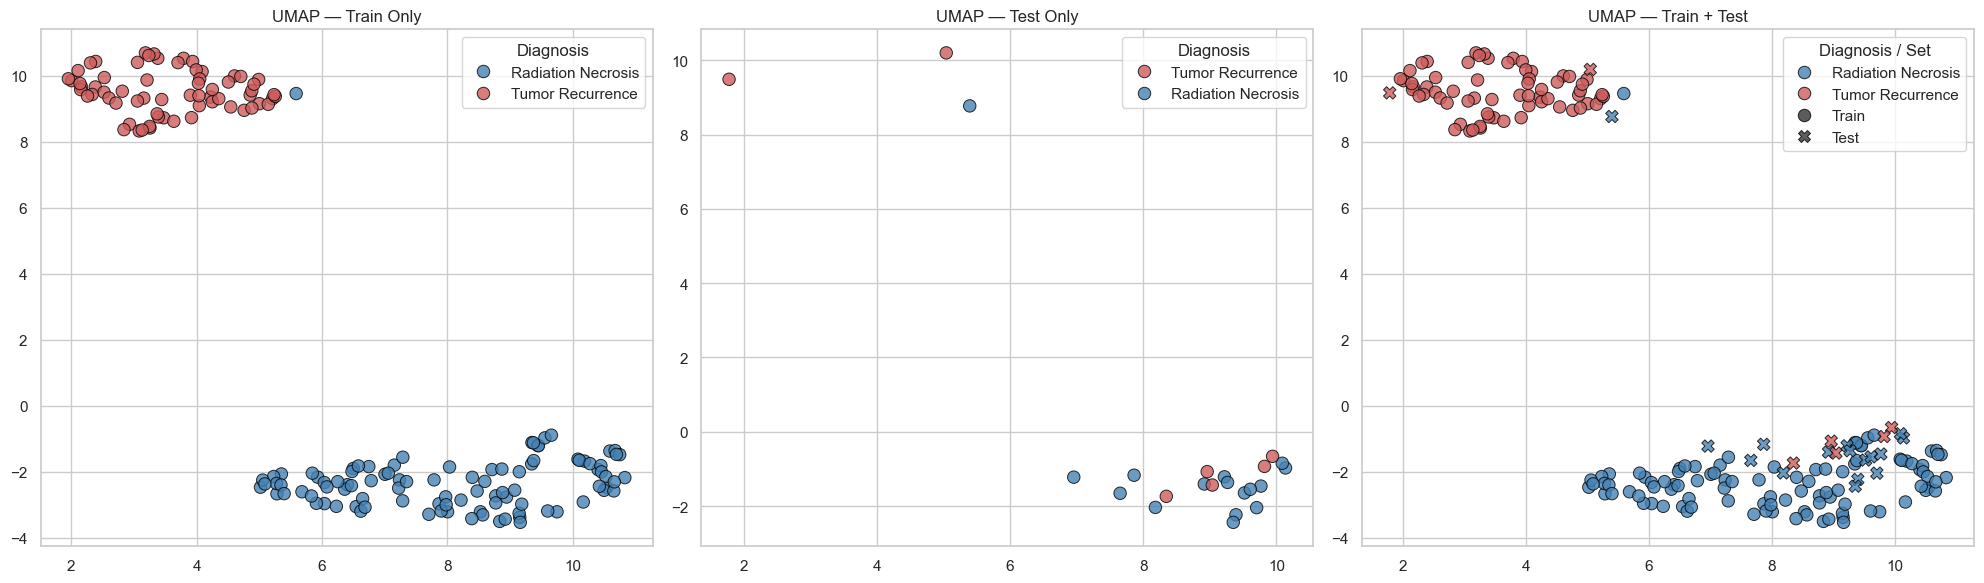

In [16]:
best_mb.plot_umap()